In [81]:
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt

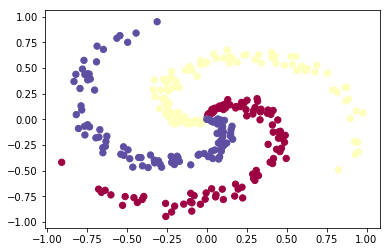

In [6]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [65]:
h = 100
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3
num_examples = X.shape[0]

for i in range(10000):
    
    hidden_layer = np.maximum(0, np.dot(X,W1) + b1)
    scores = np.dot(hidden_layer, W2) + b2

    exp_scores = np.exp(scores)
    prob = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(prob[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    
    if i%1000 == 0:
        print("Iteration: %d Loss: %f" %(i, loss))

    dscores = prob
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis = 0, keepdims=True)
    
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0
    
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis = 0, keepdims=True)
    
    dW2 += reg * W2
    dW1 += reg * W1
    
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2
    

Iteration: 0 Loss: 1.098644
Iteration: 1000 Loss: 0.296049
Iteration: 2000 Loss: 0.254184
Iteration: 3000 Loss: 0.250639
Iteration: 4000 Loss: 0.250067
Iteration: 5000 Loss: 0.249916
Iteration: 6000 Loss: 0.249811
Iteration: 7000 Loss: 0.249766
Iteration: 8000 Loss: 0.249740
Iteration: 9000 Loss: 0.249707


In [77]:
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis = 1)
print('training accuracy : %.2f '%(np.mean(y == predicted_class)))
print('training accuracy : {0:2.2f}' .format(np.mean(y == predicted_class)))

training accuracy : 0.98 
training accuracy : 0.98


In [80]:
plt.plot()